In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [30]:
df = pd.read_csv('Day_16_Healthcare_Data.csv')
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


In [32]:
missing_values = df.isnull().sum()

In [34]:
missing_values

Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

In [42]:
duplicates = df[df.duplicated()]
df = df.drop_duplicates()

In [46]:
df.duplicated().sum()

0

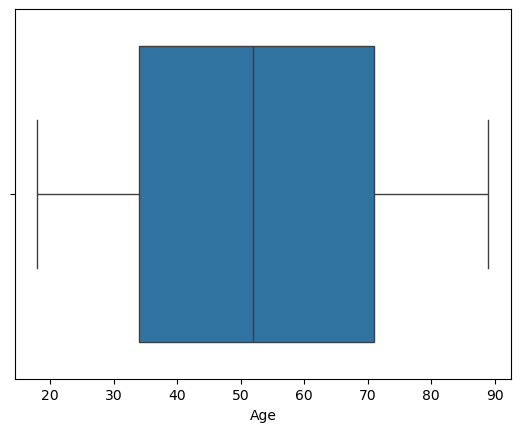

In [48]:
sns.boxplot(x=df['Age'])
plt.show()

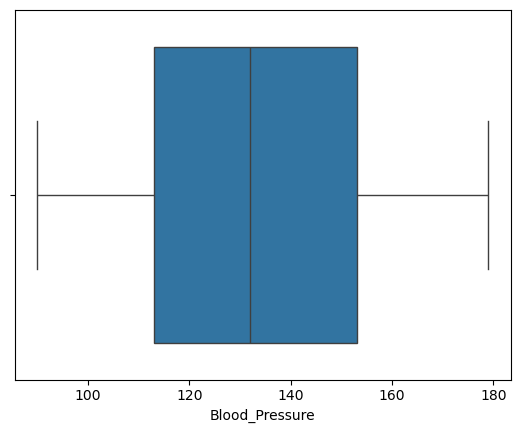

In [50]:
sns.boxplot(x=df['Blood_Pressure'])
plt.show()

In [52]:
age_95th_percentile = df['Age'].quantile(0.95)
df['Age'] = df['Age'].clip(upper=age_95th_percentile)

In [62]:
age_95th_percentile

85.04999999999995

In [54]:
blood_pressure_95th_percentile = df['Blood_Pressure'].quantile(0.95)
df['Blood_Pressure'] = df['Blood_Pressure'].clip(upper=blood_pressure_95th_percentile)

In [64]:
blood_pressure_95th_percentile

175.04999999999995

In [56]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [58]:
scaler = MinMaxScaler()
df[['Age', 'Blood_Pressure']] = scaler.fit_transform(df[['Age', 'Blood_Pressure']])

In [60]:
scaler

MinMaxScaler()

In [66]:
df.isnull().sum()

Patient_ID         0
Age                0
Gender             0
Blood_Pressure     0
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

In [68]:
df.dtypes

Patient_ID          int64
Age               float64
Gender               bool
Blood_Pressure    float64
Cholesterol       float64
Diabetes           object
Heart_Disease      object
dtype: object

In [70]:
df.duplicated().sum()

0

In [72]:
df.to_csv('cleaned_healthcare_data.csv', index=False)

In [74]:
df

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,0.760626,True,0.058789,122.0,No,No
1,2,0.208799,True,0.458554,191.0,No,No
2,3,1.000000,False,0.129336,214.0,No,No
3,4,0.894855,False,0.611405,203.0,No,No
4,5,0.298285,True,0.823045,217.0,No,No
...,...,...,...,...,...,...,...
495,496,0.238628,False,0.705467,297.0,No,Yes
496,497,1.000000,True,0.776014,146.0,Yes,No
497,498,0.656227,True,0.058789,177.0,No,Yes
498,499,0.044743,True,0.094062,223.0,No,No
